# THE SPARKS FOUNDATION

# BY-HARSH SHARMA

# TASK 1-PREDICTION USING SUPERVISED ML

Predict the score percentage of a student based on his study hour. 

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
#reading data 
url = "http://bit.ly/w-data"
dataset=pd.read_csv(url)

In [3]:
#first five data
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#number of rows and column in the data
dataset.shape

(25, 2)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
#checking for null data
dataset.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [8]:
#checking for missing values
dataset.isna().sum()

Hours     0
Scores    0
dtype: int64

In [9]:
#correlation
dataset.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# PLOTTING DATA

Text(0, 0.5, 'Percentage Score')

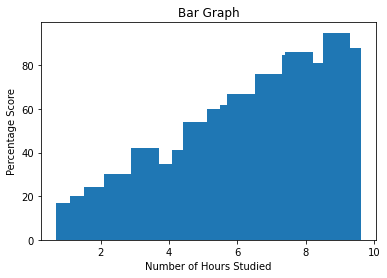

In [10]:
x=dataset['Hours']
y=dataset['Scores']
plt.bar(x,y)
plt.title('Bar Graph')  
plt.xlabel('Number of Hours Studied')  
plt.ylabel('Percentage Score')

Text(0, 0.5, 'Percentage Score')

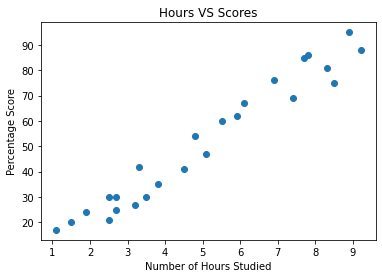

In [11]:
x=dataset['Hours']
y=dataset['Scores']
plt.scatter(x,y)
plt.title('Hours VS Scores')  
plt.xlabel('Number of Hours Studied')  
plt.ylabel('Percentage Score')

Text(0, 0.5, 'Percentage Score')

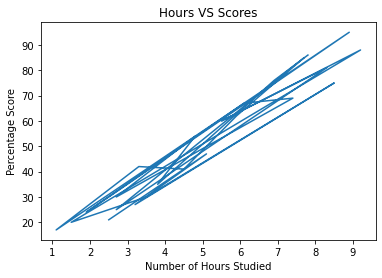

In [12]:
x=dataset['Hours']
y=dataset['Scores']
plt.plot(x,y)
plt.title('Hours VS Scores')  
plt.xlabel('Number of Hours Studied')  
plt.ylabel('Percentage Score')

# PREPARING DATA

In [13]:
#array of hours
x=dataset.iloc[:,:-1].values
print(x)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [14]:
#array of scores
y=dataset.iloc[:,1].values
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


# SPLITTING DATA: TRAINING AND TEST DATA

In [15]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [16]:
#training data through linear regression
from sklearn.linear_model import LinearRegression  
lr= LinearRegression()  
lr.fit(x_train, y_train) 

print("Training complete.")

Training complete.


In [17]:
x_train

array([[6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [18]:
y_train

array([76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21, 54, 95, 41],
      dtype=int64)

# PLOTTING REGRESSION LINE

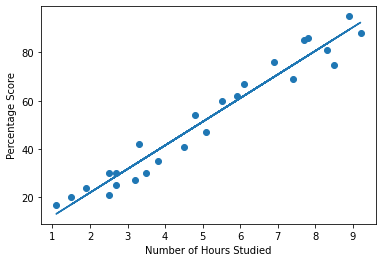

In [19]:
# Plotting the regression line
line = lr.coef_*x+lr.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x,line);
plt.xlabel('Number of Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

# PREDICTIONS

In [20]:
print('TRAIN')
print(lr.score(x_train,y_train))

TRAIN
0.9484997422695115


In [21]:
print('TEST')
print(lr.score(x_test,y_test))

TEST
0.9568211104435257


In [22]:
print(x_test) # Testing data - In Hours
y_pred = lr.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [23]:
#intercept
print(lr.intercept_)

2.370815382341881


In [24]:
#coefficient
print(lr.coef_)

[9.78856669]


In [25]:
#actual vs predicted values
dataset=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
dataset

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [26]:
#what will be the predicted score if study hpur is 9.25?
lr.predict([[9.25]])

array([92.91505723])

# EVALUATING THE MODEL

FINAL STEP IS TO CHECK THE PERFORMANCE OF THE ALGORITHM

In [27]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.419727808027652


In [28]:
print('Mean Square Error:',metrics.mean_squared_error(y_test, y_pred))

Mean Square Error: 22.96509721270043


In [29]:
print('Root Mean Square Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Square Error: 4.792191274636315
